In [30]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy as np
import pickle
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

# Load training data

In [31]:
train_path = "./train/train"
# train_path = "./val_in/val_in"
training_samples = []
# The glob module finds all the pathnames matching a specified pattern
train_pkl_lst = glob(os.path.join(train_path, '*'))
for i in range(np.array(train_pkl_lst).shape[0]):
    with open(train_pkl_lst[i], 'rb') as f:
        training_samples.append(pickle.load(f))

In [32]:
training_samples = np.array(training_samples)
print(training_samples.shape)

(205942,)


In [33]:
print(training_samples[0].keys())

dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'p_in', 'v_in', 'p_out', 'v_out', 'track_id'])


In [34]:
print(training_samples[90]['p_out'].shape)

(60, 30, 2)


In [35]:
cities_arr = []
for i in range(training_samples.shape[0]):
    cities_arr.append(training_samples[i]['city'])
cities_df = pd.DataFrame(cities_arr)
print(cities_df[0].unique())

['MIA' 'PIT']


In [36]:
# city can be either 'PIT' or 'MIA'
# replace with binary representation
# PIT is 0, MIA is 1
for i in range(training_samples.shape[0]):
    if training_samples[i]['city'] == 'PIT':
        training_samples[i]['city'] = 0
    elif training_samples[i]['city'] == 'MIA':
        training_samples[i]['city'] = 1

In [37]:
cities_arr = []
for i in range(training_samples.shape[0]):
    cities_arr.append(training_samples[i]['city'])
cities_df = pd.DataFrame(cities_arr)
print(cities_df[0].unique())

[1 0]


In [38]:
# scene index gives us no information so it can be dropped
scene_idx_arr = []
for i in range(training_samples.shape[0]):
    scene_idx_arr.append(training_samples[i]['scene_idx'])
scene_idx_df = pd.DataFrame(scene_idx_arr)
print(scene_idx_df[0].unique().shape)

(205942,)


In [39]:
# drop scene_idx
for i in range(training_samples.shape[0]):
    del training_samples[i]['scene_idx']

In [40]:
print(training_samples[0]['scene_idx'])

KeyError: 'scene_idx'

In [41]:
print(training_samples[100]['agent_id'])

00000000-0000-0000-0000-000000097011


In [42]:
# get unique values of Agent ID
agent_id_arr = []
for i in range(training_samples.shape[0]):
    agent_id_arr.append(training_samples[i]['agent_id'])
agent_id_df = pd.DataFrame(agent_id_arr)
print(agent_id_df[0].unique().shape)
print(agent_id_df[0][0])

(76670,)
00000000-0000-0000-0000-000000010222


In [43]:
# can replace last with only the last 8 values
agent_id_arr = []
for i in range(training_samples.shape[0]):
    training_samples[i]['agent_id'] = training_samples[i]['agent_id'][-8:]
    agent_id_arr.append(training_samples[i]['agent_id'])
agent_id_df = pd.DataFrame(agent_id_arr)
print(agent_id_df[0].unique().shape)
print(agent_id_df[0][0])

(76670,)
00010222


In [44]:
# for some reason the first track ID is always all 0s, lets remove that
track_id_arr = []
for i in range(training_samples.shape[0]):
    training_samples[i]['track_id'] = np.delete(training_samples[i]['track_id'], 0)
    track_id_arr.append(training_samples[i]['track_id'])
track_id_df = pd.DataFrame(track_id_arr)
print(track_id_df[0].unique().shape)

(35225,)


In [45]:
# we only need the last 8 values of track ID since the rest are zeros
track_id_arr = []
for i in range(training_samples.shape[0]):
    for j in range(training_samples[i]['track_id'].shape[0]):
        track_id_arr.append(training_samples[i]['track_id'][j])
track_id_df = pd.DataFrame(track_id_arr)
print(track_id_df[0].unique().shape)
print(track_id_df[0][0])

(141978,)
00000000-0000-0000-0000-000000010045


In [46]:
# lets actually remove them
track_id_arr = []
for i in range(training_samples.shape[0]):
    for j in range(training_samples[i]['track_id'].shape[0]):
        training_samples[i]['track_id'][j] = training_samples[i]['track_id'][j][-8:]
        track_id_arr.append(training_samples[i]['track_id'][j])
track_id_df = pd.DataFrame(track_id_arr)
print(track_id_df[0].unique().shape)
print(track_id_df[0][0])

(141978,)
00010045


In [47]:
# import pickle
# pickle.dump(training_samples, open("training_samples.p", "wb"))
# pickle.dump(training_samples, open("val_samples.p", "wb"))

In [48]:
print(training_samples[0].keys())

dict_keys(['city', 'lane', 'lane_norm', 'agent_id', 'car_mask', 'p_in', 'v_in', 'p_out', 'v_out', 'track_id'])


In [49]:
print(training_samples[0]['lane'].shape)

(333, 2)


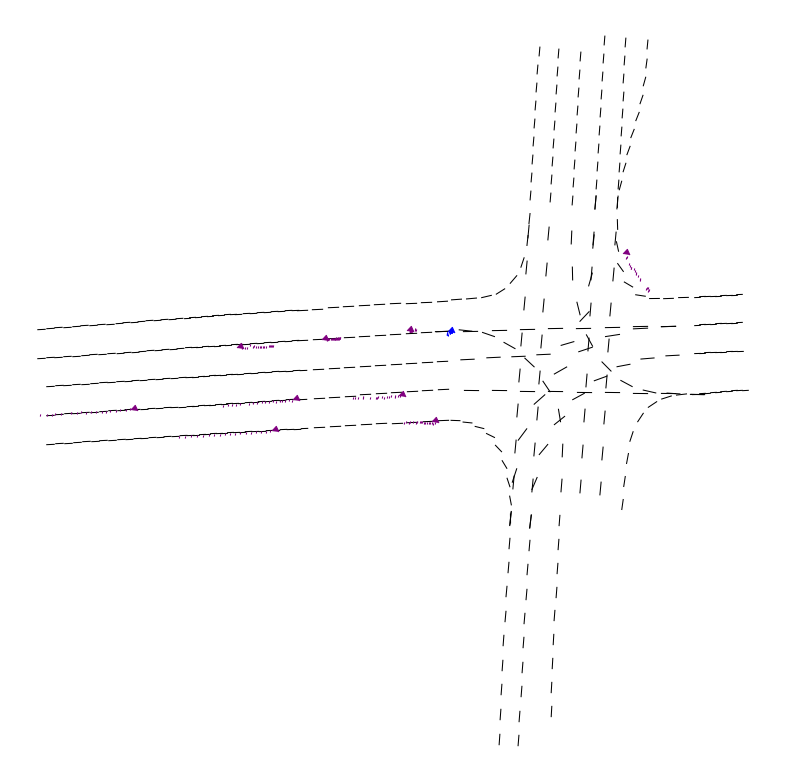

<Figure size 640x480 with 0 Axes>

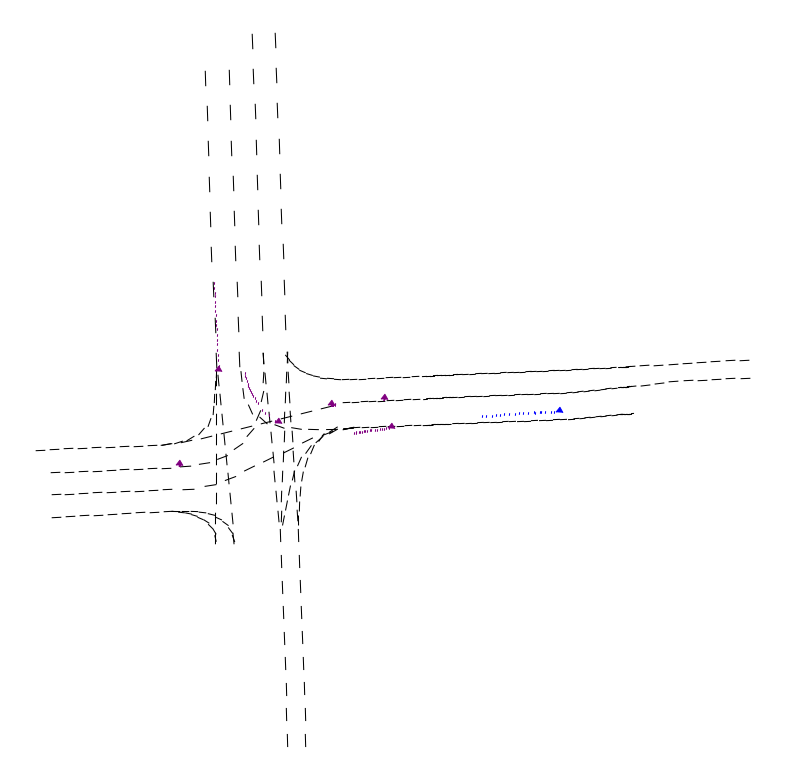

<Figure size 640x480 with 0 Axes>

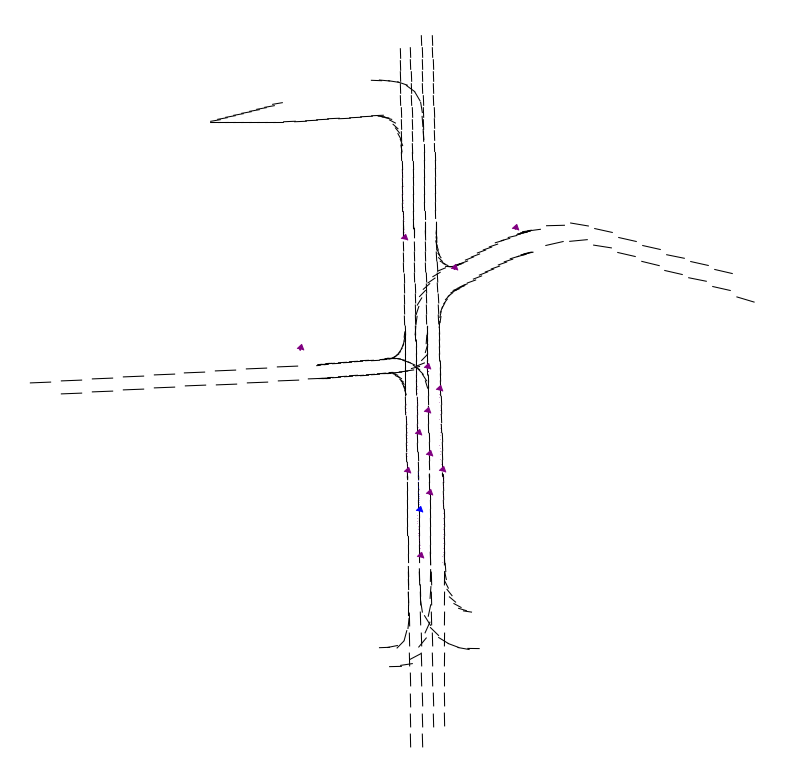

<Figure size 640x480 with 0 Axes>

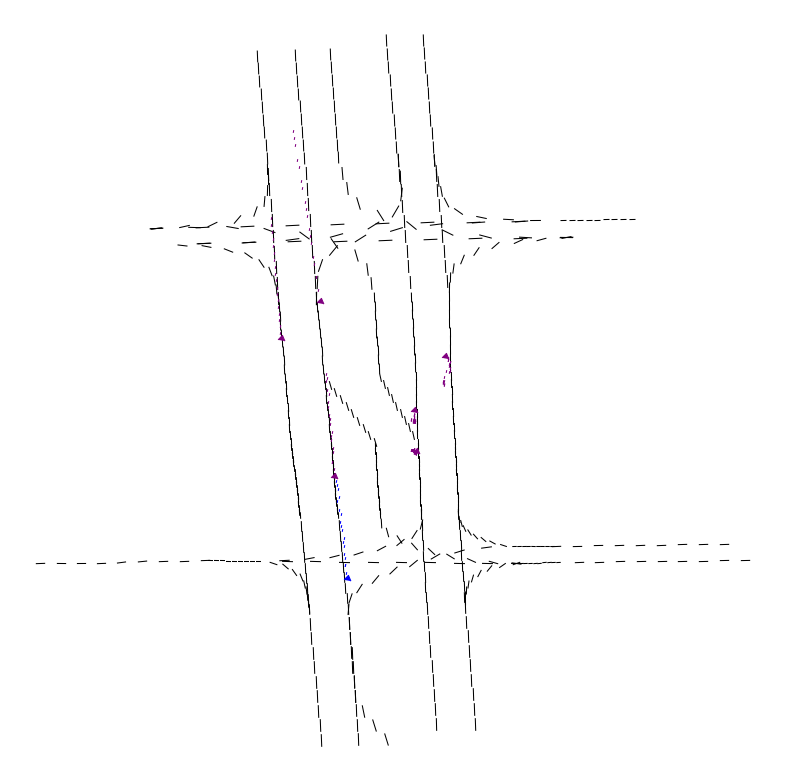

<Figure size 640x480 with 0 Axes>

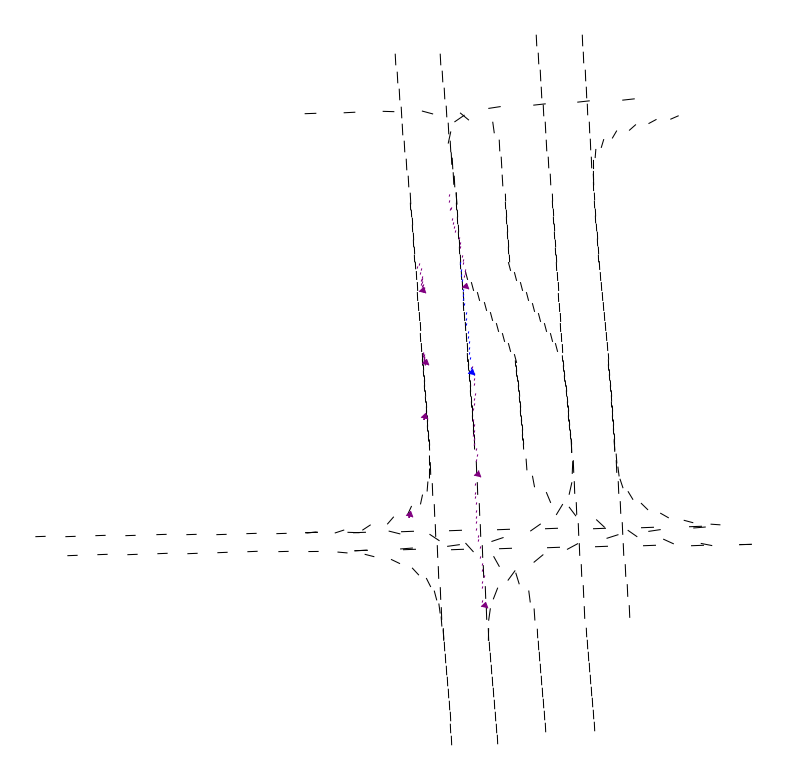

<Figure size 640x480 with 0 Axes>

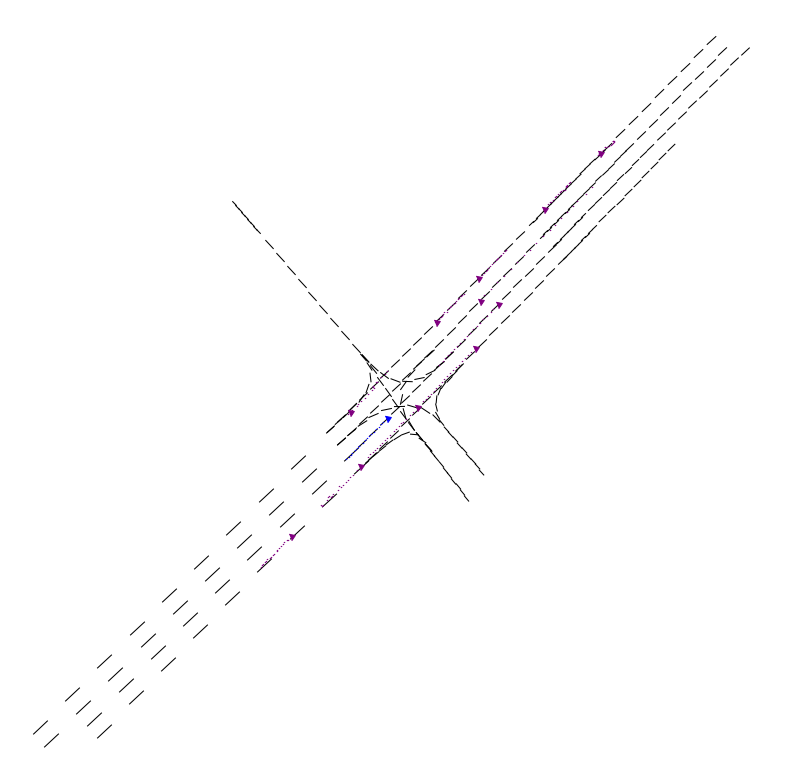

<Figure size 640x480 with 0 Axes>

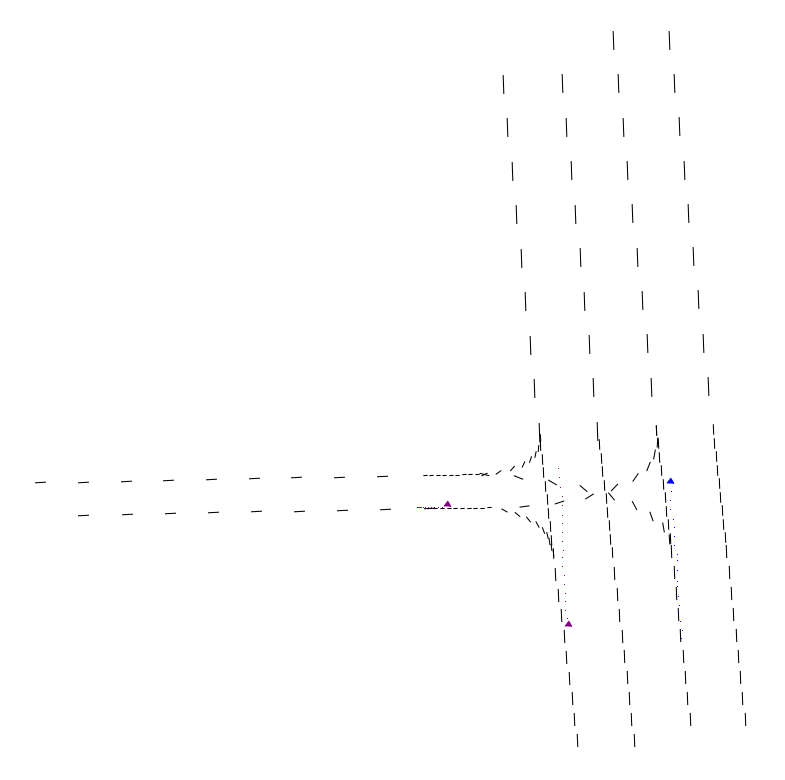

<Figure size 640x480 with 0 Axes>

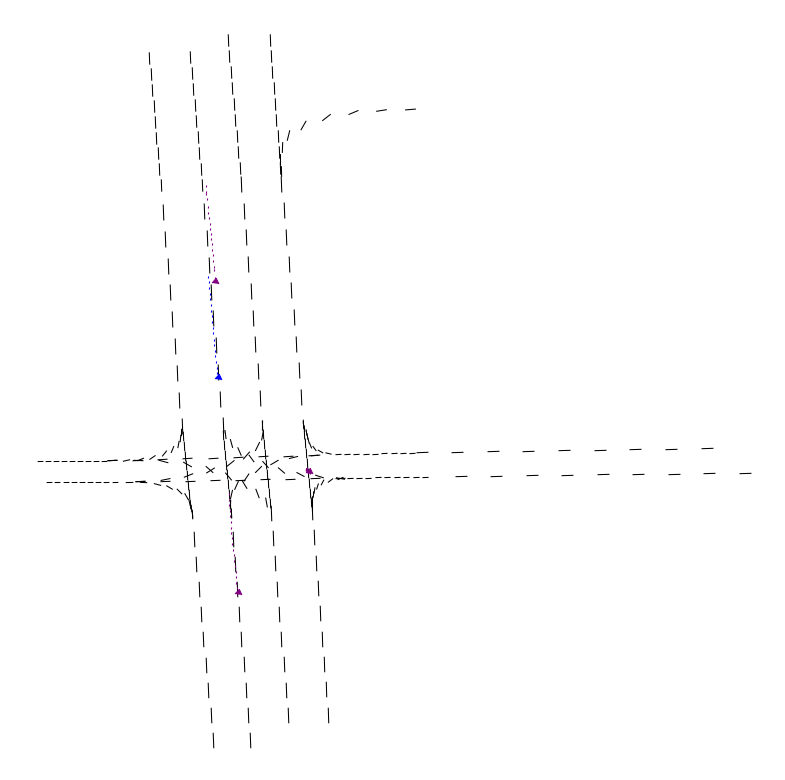

<Figure size 640x480 with 0 Axes>

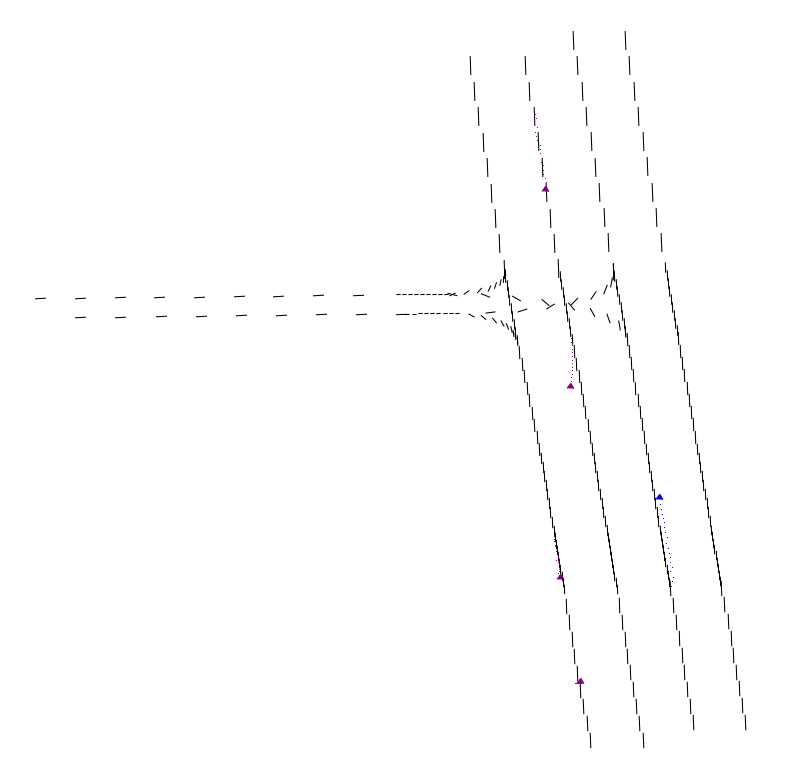

<Figure size 640x480 with 0 Axes>

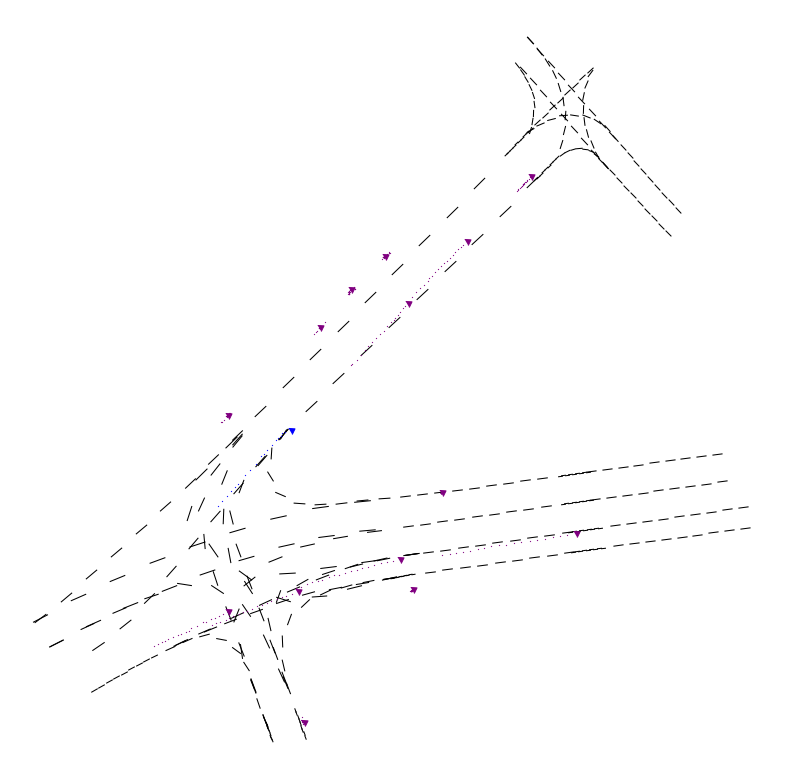

<Figure size 640x480 with 0 Axes>

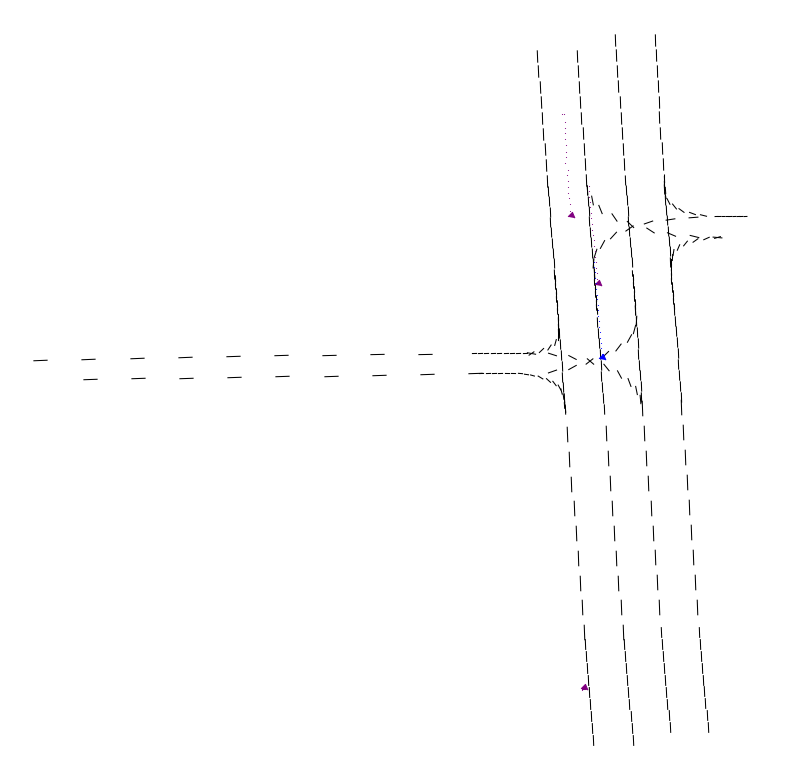

<Figure size 640x480 with 0 Axes>

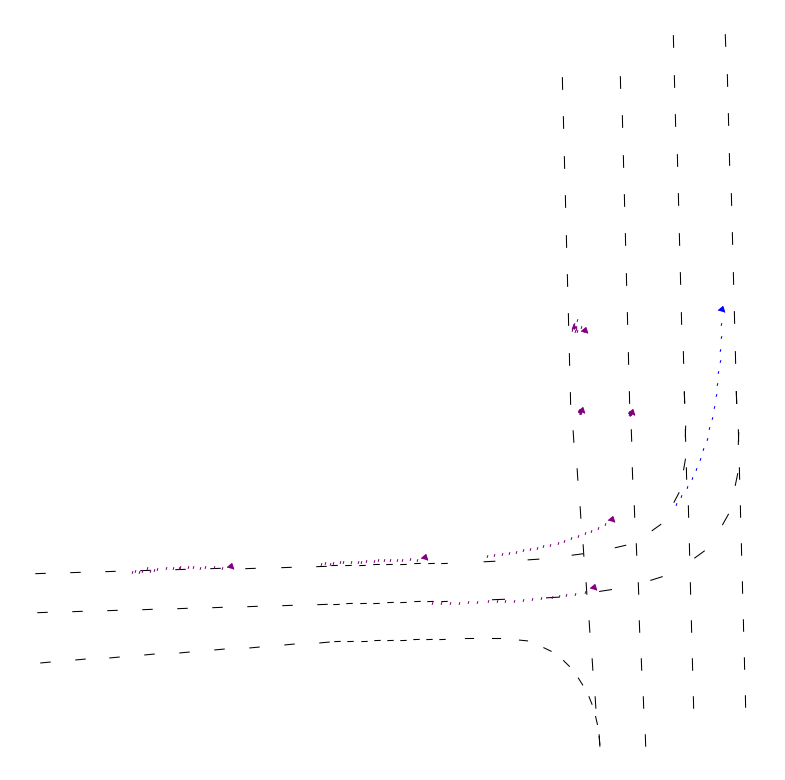

<Figure size 640x480 with 0 Axes>

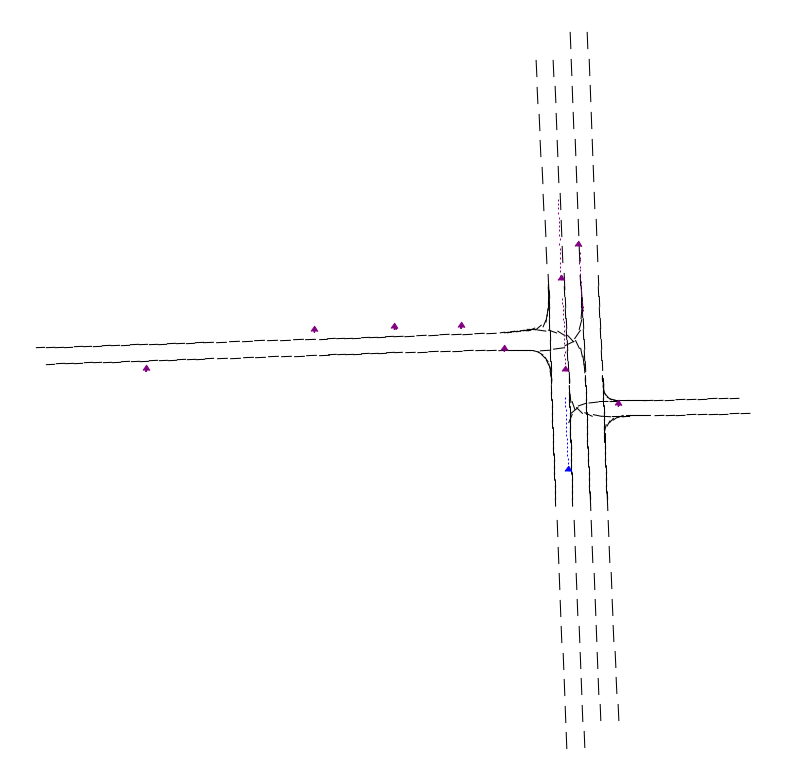

<Figure size 640x480 with 0 Axes>

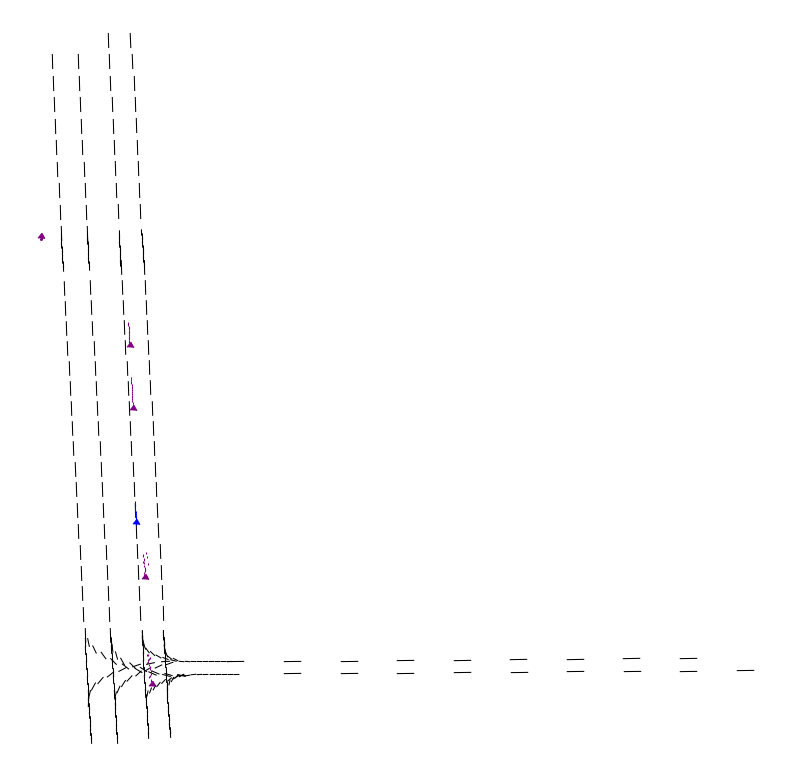

<Figure size 640x480 with 0 Axes>

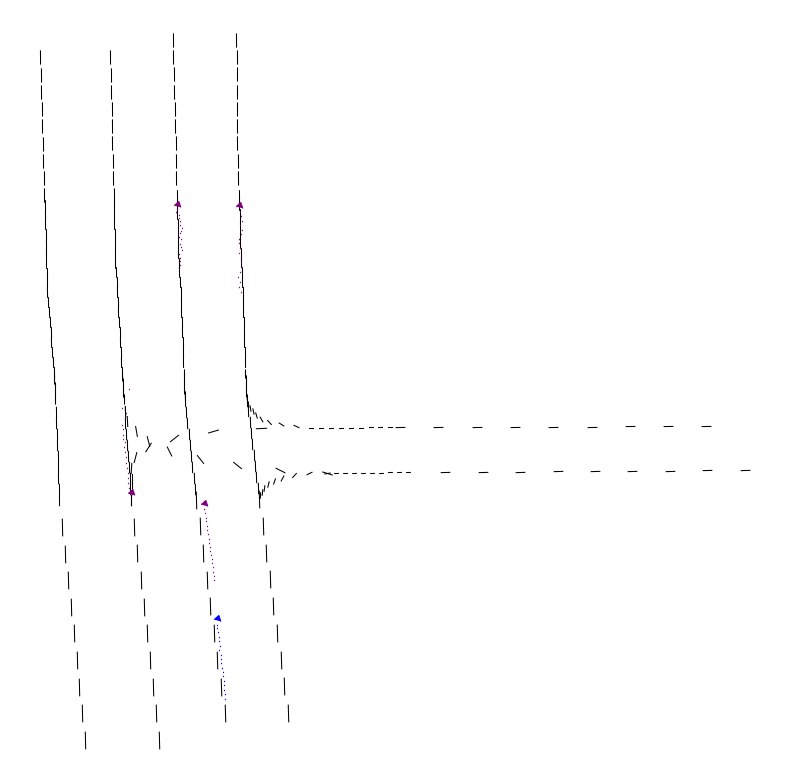

In [ ]:
# rasterization attempt
import math
import matplotlib as mpl
import random

all_data = len(training_samples)
for scene_idx in range(0, all_data):
    fig, ax = plt.subplots(figsize=(20, 20), dpi=50)
    ax.axis('off')
    # scene_idx = random.randint(0, len(training_samples))

    # get index of agent to be tracked
    idx_track = 0
    for i, j in enumerate(training_samples[scene_idx]['track_id']):
        if training_samples[scene_idx]['agent_id']==j:
            idx_track=i

    # plot lanes in the direction of their norms
    for i, p in enumerate(training_samples[scene_idx]['lane']):
        norm = np.linalg.norm(training_samples[scene_idx]['lane_norm'][i])
        angle = math.atan2(training_samples[scene_idx]['lane_norm'][i,1], training_samples[scene_idx]['lane_norm'][i,0])*(180/math.pi)
        t = mpl.markers.MarkerStyle(marker='_')
        t._transform = t.get_transform().rotate_deg(angle)
        size = 100*norm
        # size = 50
        plt.scatter(training_samples[scene_idx]['lane'][i,0], training_samples[scene_idx]['lane'][i,1], label = "lane", color = "black", marker=t, s=size, zorder=0, rasterized=True)

    # plot agents input positions, color tracked agent blue
    for i, p in enumerate(training_samples[scene_idx]['p_in']):
        if sum(training_samples[scene_idx]['p_out'][i,:,0])!=0 and sum(training_samples[scene_idx]['p_out'][i,:,1])!=0 and sum(training_samples[scene_idx]['p_in'][i,:,0])!=0 and sum(training_samples[scene_idx]['p_in'][i,:,1])!=0:
            for j, q in enumerate(training_samples[scene_idx]['p_in'][i,:,0]):
                color = 'purple'
                z = 1
                if i==idx_track:
                    color = 'blue'
                    z = 2
                norm_vel_j = training_samples[scene_idx]['p_in'][i,j]/np.linalg.norm(training_samples[scene_idx]['p_in'][i,j])
                angle = math.atan2(norm_vel_j[1], norm_vel_j[0])*(180/math.pi)
                t = mpl.markers.MarkerStyle(marker='_')
                size = 5*norm
                if j==len(training_samples[scene_idx]['p_in'][i,:,0])-1:
                    t = mpl.markers.MarkerStyle(marker=9)
                    size = 100
                t._transform = t.get_transform().rotate_deg(angle)
                plt.scatter(training_samples[scene_idx]['p_in'][i,j,0], training_samples[scene_idx]['p_in'][i,j,1], label = "p_in", color = color, marker=t, s=size, zorder=z, rasterized=True)
                # plt.scatter(training_samples[scene_idx]['p_out'][i,:,0], training_samples[scene_idx]['p_out'][i,:,1], label = "p_out", color = color)


    # plt.scatter(training_samples[scene_idx]['p_in'][idx_track,:,0], training_samples[scene_idx]['p_in'][idx_track,:,1], label = "p_in_track", color = "blue", marker=t, s=10)
    # plt.scatter(training_samples[scene_idx]['p_out'][idx_track,:,0], training_samples[scene_idx]['p_out'][idx_track,:,1], label = "p_out_track", color = "red")
    # plt.show()
    plt.savefig(f"./rasterized_data/rasterized_train_{str(scene_idx)}.png", dpi=150)
    plt.close('all')
    plt.clf() 